In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import copy

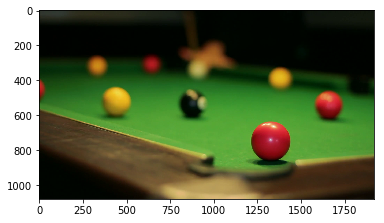

In [2]:
path='./3.png'
img=cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

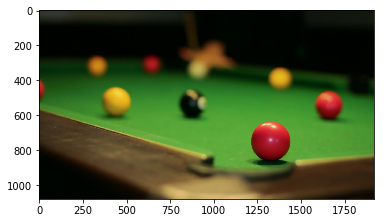

In [4]:
path = './3.png'
img = cv2.imread(path)
img = cv2.GaussianBlur(img,(5,5),0)
img1 = cv2.bilateralFilter(img,9,25,75)
r = int(np.sqrt(np.size(img))/100)
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1)

In [5]:
#default setting for red mask
#lower_red=np.array([169, 100, 100])             
#upper_red=np.array([189, 255, 255])

lower_red=np.array([169, 100, 100])             
upper_red=np.array([189, 255, 255])
# lower_red=np.array([0, 50, 50])             
# upper_red=np.array([8, 170, 200])

mask_red=cv2.inRange(hsv,lower_red,upper_red)
#inRange는 범위 안에 들어가면 1, 그렇지 않으면 0으로 만들어 준다
res_red=cv2.bitwise_and(img,img,mask=mask_red)
#bitwise_and 함수는 둘다 0이 mask가 검정색이 아닌 경우만 통과, mask 이외 부분을 모두 제거
not_red=cv2.bitwise_not(img,img,mask=mask_red)


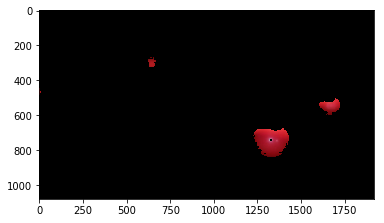

In [6]:
plt.imshow(res_red)

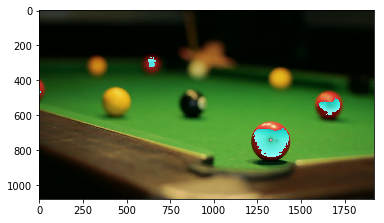

In [7]:
plt.imshow(not_red)

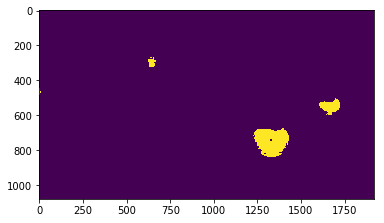

In [8]:
plt.imshow(mask_red)

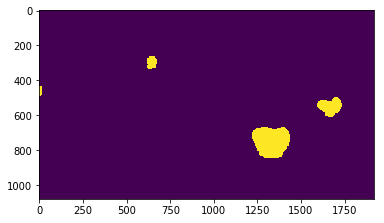

In [11]:
kernel = np.ones((15,15), np.uint8)
img_dilation = cv2.dilate(mask_red, kernel, iterations=1)
plt.imshow(img_dilation)

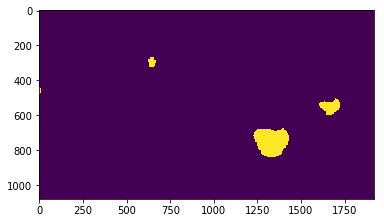

In [12]:
img_erosion = cv2.erode(img_dilation, kernel, iterations=1)
plt.imshow(img_erosion)

In [13]:
imgray = img_erosion
ret, thresh = cv2.threshold(imgray,127,255,0)

image, contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# 첫번째 contours의 moment 특징 추출
cnt = contours[0]
M = cv2.moments(cnt)

In [14]:
cx = int(M['m10']/M['m00'])

In [15]:
cy = int(M['m01']/M['m00'])

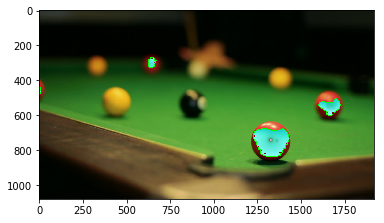

In [16]:
cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(img)